# Raport - metody głębokiego uczenia - pd 1.

Autorzy: Olaf Skrabacz, Tymoteusz Makowski

## Wczytanie pakietów

In [1]:
import numpy as np
import pandas as pd
from NeuralNetwork import NeuralNetwork
from Layer import Layer
from utils import plot_decision_surface, one_hot_encode
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML
sns.set_style("darkgrid")
np.random.seed(1337)

### Zbiór nr 1 -- XOR

### Wczytanie danych

In [2]:
df = pd.read_csv("Classification//data.XOR.train.1000.csv")
df_test = pd.read_csv("Classification//data.XOR.test.1000.csv")

#### Wizualizacja zbioru treningowego i testowego

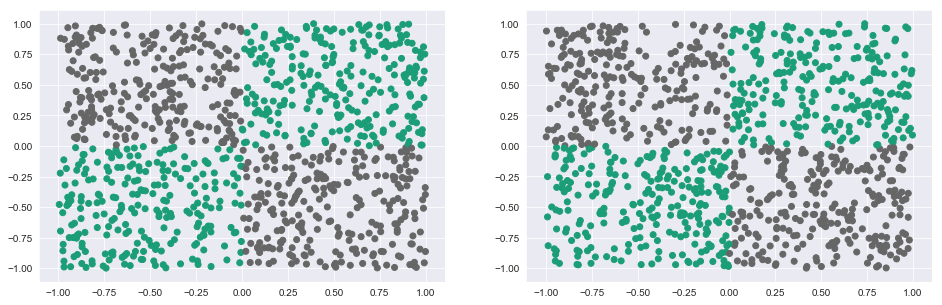

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
pass

Jak widać zbiory są dla człowieka łatwo separowalne. Rozkłady na zbiorach testowych i treningowych są takie same, a zatem nie powinno być problemu z rozwiązaniem tego problemu przez sieć.

#### Analiza

In [4]:
X = df[['x','y']].values
X_test = df_test[['x','y']].values
y = df['cls'].values.reshape(-1,1) - 1
y_test = df_test['cls'].values.reshape(-1,1) - 1

Trzeba pamiętać by klasy były w zbiorze $\{0, 1\$}, ponieważ takie założenie przyjmuje funkcja błedu oraz jej pochodna.

In [16]:
nn = NeuralNetwork(loss="cross_entropy", momentum=0.9)
nn.add(Layer(units=30, input_shape=2, activation_function="sigmoid"))
nn.add(Layer(units=15, input_shape=30, activation_function="sigmoid"))
nn.add(Layer(units=1, input_shape=15, activation_function="sigmoid"))

Zobaczmy jak zmienia się powierzchnia decyzyjna w zależności od liczby epok (iteracji).

99

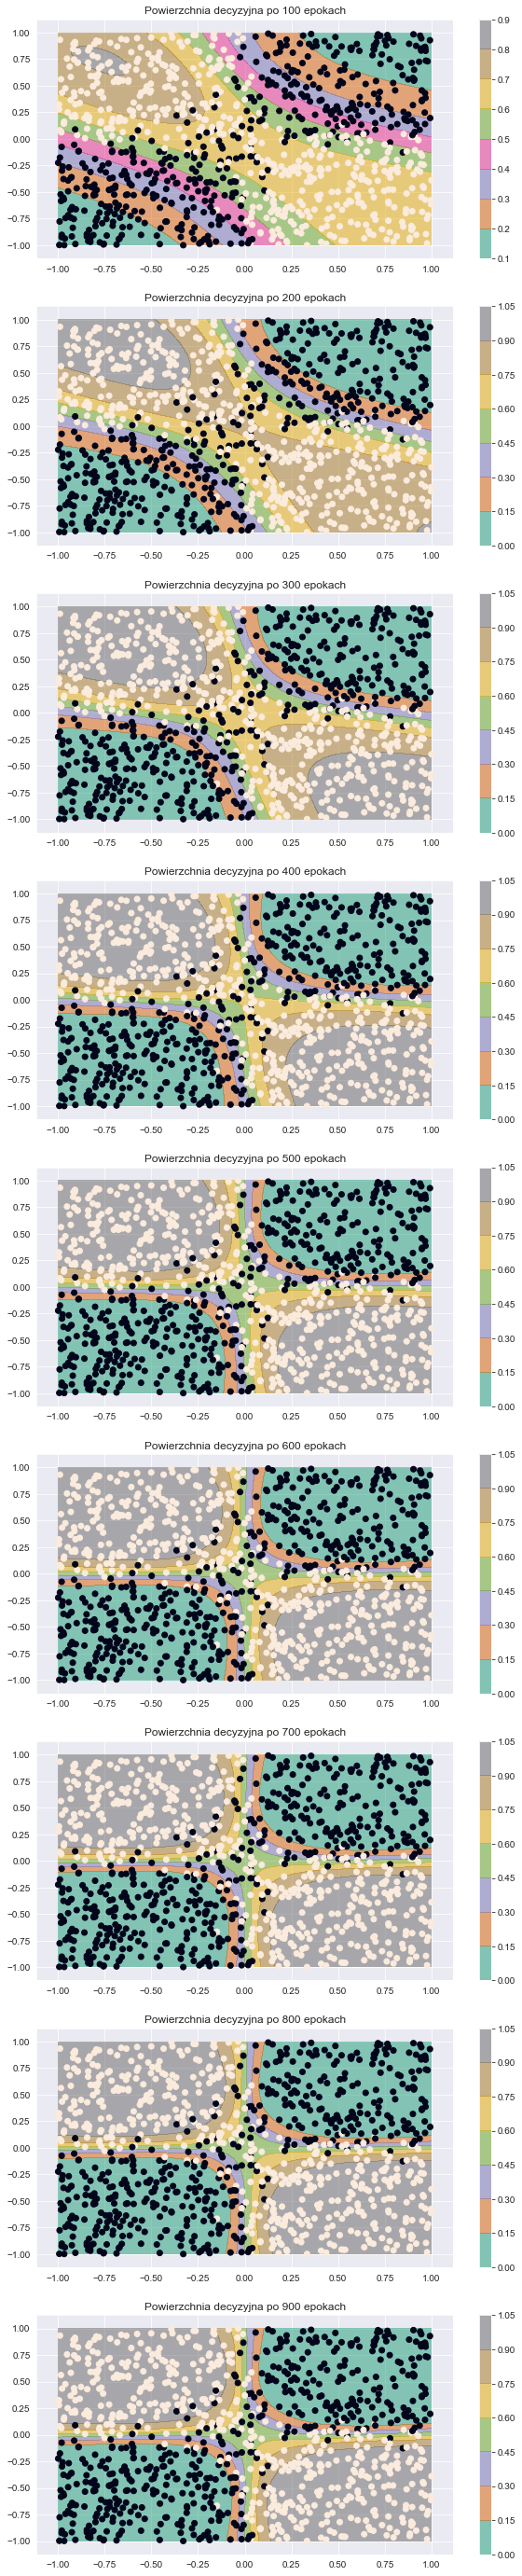

In [17]:
fig, axs = plt.subplots(9, 1, figsize=(10,50))
for i in range(1,10):
    loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=100, learning_rate=1e-0, momentum=0.9)
    im = plot_decision_surface(nn, df_test, proba=True,axis=axs[i-1], cmap='Dark2', alpha=0.5)
    fig.colorbar(im, ax = axs[i-1])
    axs[i-1].scatter(df_test['x'], df_test['y'], c=df_test['cls'])
    axs[i-1].set_title(f"Powierzchnia decyzyjna po {i*100} epokach")
    pass
    

Jak widać sieć z kolejnymi epokami jest coraz bardziej pewna swojej predykcji. Dodatkowo widać, że w miejscu styku obu klas sieć jest dużo mniej pewna niż w obszarze, gdzie występują obiekty tylko jednej klasy.

### Zbiór nr 2 -- zaszumiony XOR

#### Wczytanie danych

In [13]:
df = pd.read_csv("Classification//data.noisyXOR.train.1000.csv")
df_test = pd.read_csv("Classification/data.noisyXOR.test.1000.csv")

#### Wizualizacja zbioru treningowego i testowego

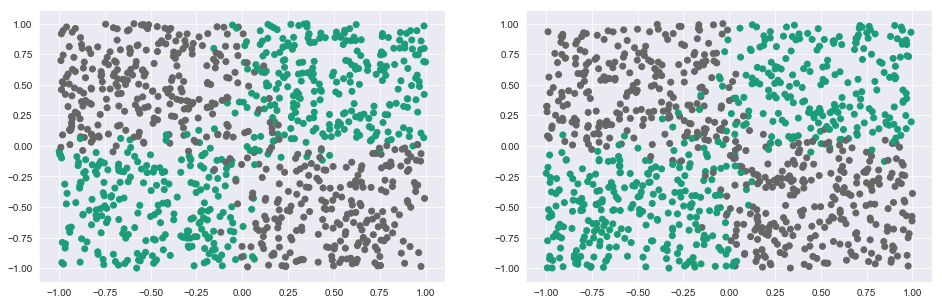

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
pass

Mamy do czynienia z zaszumioną wersją poprzedniego zbioru. Zobaczmy jak zmieni to powierzchnie decyzyjną w porównaniu do poprzedniego problemu.

#### Analiza

In [23]:
X = df[['x','y']].values
X_test = df_test[['x','y']].values
y = df['cls'].values.reshape(-1,1) - 1
y_test = df_test['cls'].values.reshape(-1,1) - 1

In [29]:
nn = NeuralNetwork(loss="cross_entropy", momentum=0.9)
nn.add(Layer(units=30, input_shape=2, activation_function="sigmoid"))
nn.add(Layer(units=15, input_shape=30, activation_function="sigmoid"))
nn.add(Layer(units=1, input_shape=15, activation_function="sigmoid"))

899

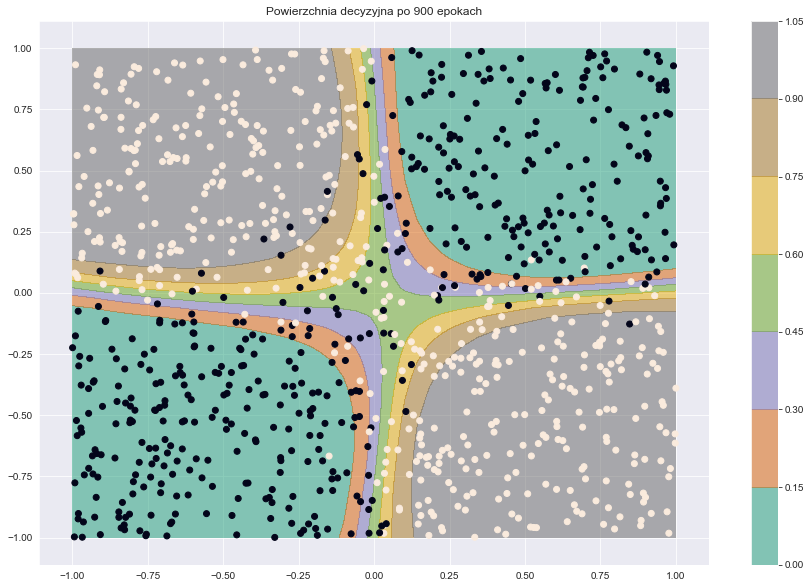

In [30]:
plt.figure(figsize=(15,10))
loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=900, learning_rate=1e-0, momentum=0.9)
im = plot_decision_surface(nn, df_test, proba=True, cmap='Dark2', alpha=0.5)
plt.colorbar(im)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'])
plt.title(f"Powierzchnia decyzyjna po {900} epokach")
pass

Widać, że powierzchnia decyzyjna na tym zbiorze wygląda podobnie do poprzedniej. Jednakże główną różnicą jest szersza przestrzeń, gdzie model nie jest pewny klasy, ponieważ został dodany tam szum.

### Zbiór nr 3 -- „Three Gaussian”

#### Wczytanie danych

In [76]:
np.random.seed(1234)

df = pd.read_csv("MGU_projekt1/Classification/data.three_gauss.train.1000.csv")
df_test = pd.read_csv("MGU_projekt1/Classification/data.three_gauss.test.1000.csv")

#### Wizualizacja zbioru treningowego i testowego

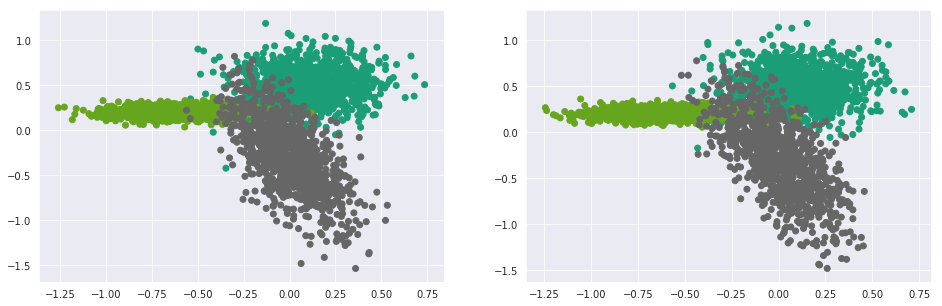

In [77]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
plt.show()

Po lewej widzimy zbiór treningowy, a po prawej zbiór testowy. Wszystkie reprezentowane klasy zakrawają o siebie, więc można spodziewać się problemu niedokładnej klasyfikacji przy krawędziach klas.

#### Analiza

Aby spełnić wcześniej wspomniane założenie o etykietach ze zbioru $\{0, 1\}$ zastosujemy funkcję `one_hot_encode`, która z wektora `y` tworzy macierz o liczbie kolumn równej liczbie klas w problemie i wstawia jedynkę w $i$-tej kolumnie, jeśli dany wiersz należy do $i$-tej klasy.

Sieć, którą zastosowaliśmy składa się z trzech warstw -- dwóch sigmoidalnych o kolejno 20 i 30 neuronach oraz warstwy wyjściowej z funkcją aktywacji `softmax`.

In [78]:
X_train = np.array(df.loc[:, ["x", "y"]])
y_train = np.array(df.cls).reshape(-1, 1)
X_test = np.array(df_test.loc[:, ["x", "y"]])
y_test = np.array(df_test.cls).reshape(-1, 1)

In [79]:
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(20, 2, "sigmoid"))
nn.add(Layer(30, 20, "sigmoid"))
nn.add(Layer(3, 30, "softmax"))

Aby uniknąć „wybuchania” gradientu, to jest przyjmowania przez niego bardzo dużych wartości, z początku stosujemy dość niski współczynnik uczenia. Następnie ten współczynnik stopniowo zwiększamy, żeby przyspieszyć proces uczenia

In [80]:
loss1, test_loss1, grad_norm1 = nn.train(
    X_train, one_hot_encode(y_train, 3),
    X_test, one_hot_encode(y_test, 3),
    epochs=80,
    learning_rate=1e-4,
    verbose=False
)

loss2, test_loss2, grad_norm2 = nn.train(
    X_train, one_hot_encode(y_train, 3),
    X_test, one_hot_encode(y_test, 3),
    epochs=100,
    learning_rate=1e-2,
    verbose=False
)

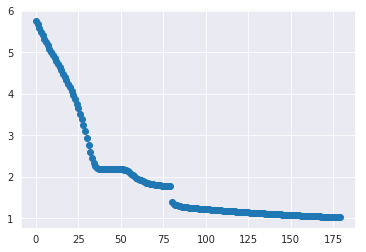

In [81]:
plt.scatter(np.arange(180), loss1+loss2)

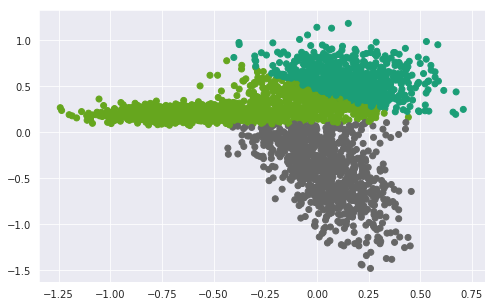

In [82]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

Tak jak przewidywaliśmy, sieć najwięcej punktów źle zaklasyfikowała w rejonie nachodzenia na siebie poszczególnych klas.

### Zbiór nr 4 -- „simple”

#### Wczytanie danych

In [83]:
df = pd.read_csv("MGU_projekt1/Classification/data.simple.train.1000.csv")
df_test = pd.read_csv("MGU_projekt1/Classification/data.simple.test.1000.csv")

X_train = np.array(df.loc[:, ["x", "y"]])
y_train = np.array(df.cls).reshape(-1, 1)
X_test = np.array(df_test.loc[:, ["x", "y"]])
y_test = np.array(df_test.cls).reshape(-1, 1)

#### Wizualizacja zbioru treningowego i testowego

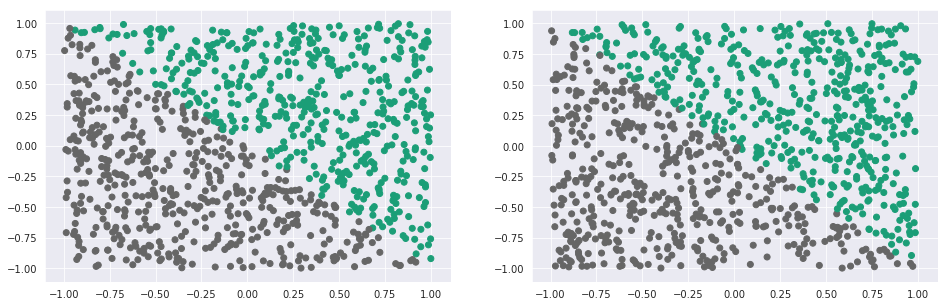

In [84]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
plt.show()

Widać, że zbiór jest, jak sama nazwa wskazuje, dość prosty, więc sieć, którą tutaj zastosowaliśmy również jest bardzo prosta. Podobnie jak w przypadku poprzedniego zbioru możemy spodziewać się błędów w klasyfikacji na złączeniu obu klas.

#### Analiza

In [85]:
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(2, 2, "sigmoid"))

In [86]:
loss, test_loss, grad_norm = nn.train(
    X_train, one_hot_encode(y_train, 2),
    X_test, one_hot_encode(y_test, 2),
    epochs=50,
    learning_rate=1
)

49

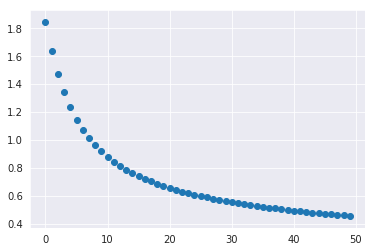

In [87]:
plt.scatter(np.arange(len(loss)), loss)

Błąd bardzo szybko zbiega do zera przy dość dużym współczynniku nauki. Dzięki temu już po 50 epokach otrzymujemy bardzo zadowalające wyniki.

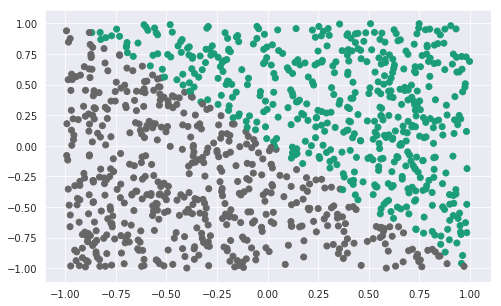

In [88]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

Sieć dość dobrze klasyfikuje punkty, choć ponownie, jak można było się spodziewać, klasyfikacja nie jest idealna, jeśli chodzi o punkty leżące na pograniczu obu klas.

# Zbiór nr 5 -- „circles”

#### Wczytanie danych

In [89]:
df = pd.read_csv("MGU_projekt1/Classification/data.circles.train.1000.csv")
df_test = pd.read_csv("MGU_projekt1/Classification/data.circles.test.1000.csv")

X_train = np.array(df.loc[:, ["x", "y"]])
y_train = np.array(df.cls).reshape(-1, 1)
X_test = np.array(df_test.loc[:, ["x", "y"]])
y_test = np.array(df_test.cls).reshape(-1, 1)

#### Wizualizacja zbioru treningowego i testowego

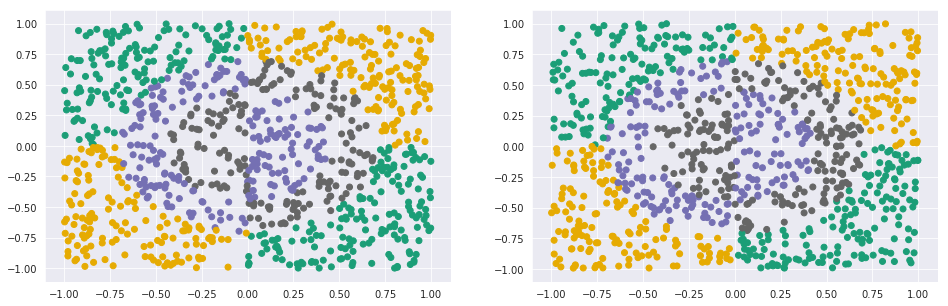

In [90]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
plt.show()

Zbiór ten w widoczny sposób ma wiele klas graniczących ze sobą co sprawia, że klasyfikacja na tym zbiorze nie należy do trywialnych.


#### Analiza

Spośród licznych prób niewiele osiągnęło rozsądne rezultaty, a i najlepszy wynik jaki udało nam się osiągnąć również nie jest zadowalający.

In [454]:
nn = NeuralNetwork("cross_entropy", 0)
nn.add(Layer(3, 2, "sigmoid"))
nn.add(Layer(5, 3, "sigmoid"))
nn.add(Layer(4, 5, "sigmoid"))

In [455]:
loss, test_loss, grad_norm = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=300, learning_rate=1e-2)

299

In [456]:
loss2, test_loss2, grad_norm2 = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=300, learning_rate=1e-1)

299

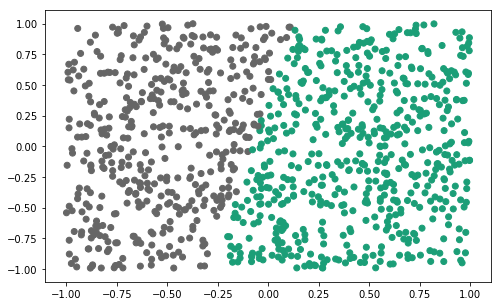

In [457]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

In [458]:
loss3, test_loss3, grad_norm3 = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=2000, learning_rate=1e-0)

1999

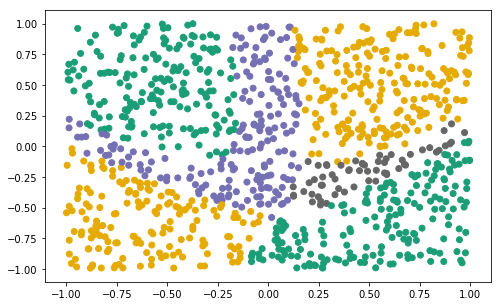

In [459]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

Podział nabiera trochę kształtu przy przebiegnięciu 2600 epok, jednakże daleko mu do ideału.

In [460]:
loss4, test_loss4, grad_norm4 = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=1400,
    learning_rate=1e-0
)

1399

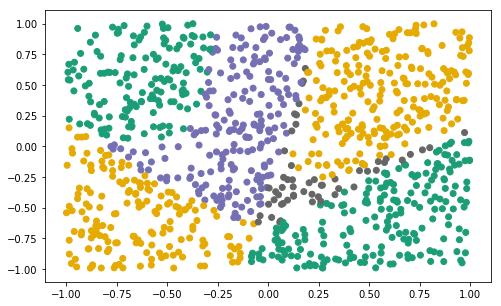

In [461]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

Wyrównując liczbę epok do 4000 tak naprawdę nie wiele zyskaliśmy. Na pierwszy rzut oka wynik jest tożsamy z tym z poprzedniego kroku, choć w rzeczywistości wyniki te nieznacznie się różnią.

In [462]:
loss5, test_loss5, grad_norm5 = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=10000,
    learning_rate=1e-0
)

9999

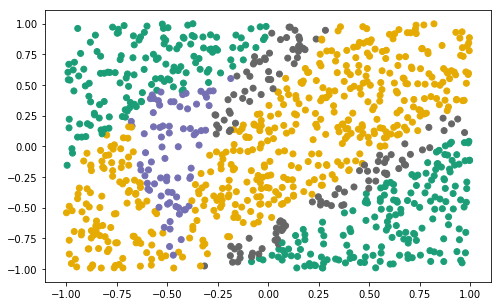

In [463]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

Dodając kolejne 10000 epok nadal nie wiele zyskujemy przy tej strukturze sieci. Dwie klasy są w miarę dobrze dopasowane, lecz dwie pozostałe pozostawiają wiele do życzenia. Nie wpływa to jedank na fakt, że zarówno błąd na zbiorze treningowym (po lewej), jak i błąd na zbiorze testowym (po prawej) powoli zbiegają do zera.

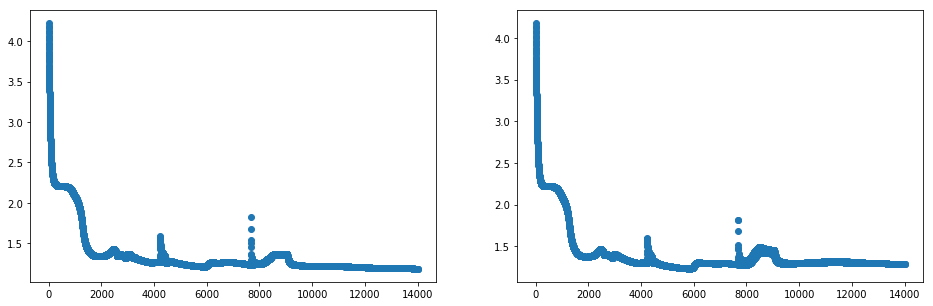

In [471]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(loss+loss2+loss3+loss4+loss5)), loss+loss2+loss3+loss4+loss5)
plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(test_loss+test_loss2+test_loss3+test_loss4+test_loss5)), test_loss+test_loss2+test_loss3+test_loss4+test_loss5)
plt.show()

Ten przykład pokazuje nam, że ważną rolę odgrywa struktura sieci oraz że nie każdego zbioru można się nauczyć manipulując jedynie współczynnikiem uczenia i liczbą iteracji.